In [2]:
import numpy as np
import matplotlib.pyplot as plt

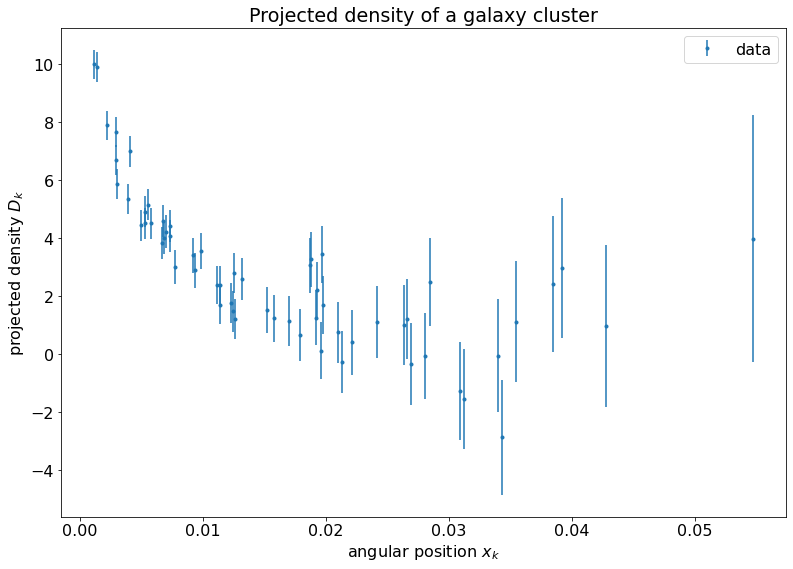

In [3]:
#1a)
x, D, sigma = np.loadtxt('ProjectedDensity.dat', unpack = True)

plt.rcParams['figure.figsize']=[13,9]
plt.rcParams.update({'font.size':16})
plt.errorbar(x, D, yerr=sigma, fmt='.', label='data')
plt.xlabel(r'angular position $x_k$')
plt.ylabel(r'projected density $D_k$')
plt.title('Projected density of a galaxy cluster')
plt.legend()
plt.show()

In [33]:
#1b)
N = 60
M = 10
theta = np.zeros(10)
delta_x = (x[-1] - x[0])/M
for j in range(0, M, 1):
    theta[j] = x[0] + delta_x*((j+1)-(1./2.))
    
#print(theta)

T = np.zeros([N, M])

for k in range(N):
    for j in range(M):
        sum_1 = np.max([0., 1. - abs(x[k] - theta[j])/delta_x])
        sum_2 = (2*np.kron(j, 1) - np.kron(j, 2))*(np.max([0, 1 - abs(x[k] - theta[j] + delta_x)/delta_x]))
        sum_3 = (2*np.kron(j, M) - np.kron(j, M-1))*(np.max([0, 1 - abs(x[k] - theta[j] - delta_x)/delta_x]))
        T_kj = sum_1 + sum_2 + sum_3
        T[k, j] = T_kj
        
print(T)
a_start = np.array([1., 1, 1., 1., 1., 1., 1., 1., 1., 1.])

def F(a_start):
    F = np.matmul(T,a_start)

    return F

#print(F(a_start))
#print(D_k)

def gradient(F):
    gradient = np.zeros(10)
    for i in range(M):
        summe = 0
        for k in range(N):
            summe += 2.*(F[k]-D[k])*T[k, i]/sigma[k]**2
        gradient[i] = summe
    return gradient
def hessian(F):
    hessian = np.zeros([M,M])
    for i in range(M):
        for j in range(M):
            for k in range(N):
                hessian[i][j] += 2.*(T[k][j]*T[k][i])/(sigma[k]**2)
    return hessian


[[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.54870560e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.99835728e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.43865985e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.44705029e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.59258504e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.71906257e-01 2.80937433e-02 0.00000000e+00 0.00000000e

In [34]:
#1.c)  
a_it = a_start
a = np.zeros(M)
for it in range(20):
    for j in range(M):
        summe = 0
        for i in range(M):
            summe += np.linalg.inv(hessian(F))[j,i]*gradient(F(a_start))[i]
        a[j] = a_it[j] - summe
    a_it = a
print(a)

[ 1.48420163e+02 -1.33561514e+01 -1.78411820e+01 -1.84610056e+01
 -1.92576613e+01 -1.85161438e+01 -5.81992188e+01  2.68287500e+03
 -2.08319000e+05  1.83281000e+05]
